In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
import tensorflow.keras.layers
import tensorflow as tf



In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import concatenate
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD, Adam
import cv2
import numpy as np



In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR',
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'/content/drive/My Drive/Dataset/DR', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(224, 224, 3))

Found 2208 images belonging to 5 classes.
Found 552 images belonging to 5 classes.


In [ ]:
import keras
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
import tensorflow.keras.applications


# Load DenseNet-169 model without top layers
inceptionv3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a Sequential model
inceptionv3 = keras.models.Sequential()

# Set layers in densenet169_model to non-trainable
for layer in inceptionv3_model.layers:
    layer.trainable = False

# Add layers to the model
inceptionv3.add(inceptionv3_model)
inceptionv3.add(Flatten())
inceptionv3.add(Dropout(0.2))
inceptionv3.add(Dense=1024, activation='relu')
inceptionv3.add(Dropout(0.2))
inceptionv3.add(Dense(512, activation='relu'))
inceptionv3.add(Dense(5, activation='softmax'))

# Compile the model
adam = Adam(learning_rate=0.001)
inceptionv3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', precision_m, recall_m, f1_m])

# Assuming you have your ImageDataGenerators set up
# train_generator = ...
# validation_generator = ...

# Train the model
graph = inceptionv3.fit(train_generator, epochs=25, validation_data=validation_generator)


# Print the results
print(graph.history)


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/25
69/69 [==============================] - 607s 9s/step - loss: 1.2904 - accuracy: 0.5380 - val_loss: 1.1140 - val_accuracy: 0.6232
Epoch 2/25
69/69 [==============================] - 14s 199ms/step - loss: 1.0521 - accuracy: 0.6214 - val_loss: 1.0117 - val_accuracy: 0.6558
Epoch 3/25
69/69 [==============================] - 14s 200ms/step - loss: 0.9654 - accuracy: 0.6427 - val_loss: 0.9633 - val_accuracy: 0.6721
Epoch 4/25
69/69 [==============================] - 14s 196ms/step - loss: 0.9082 - accuracy: 0.6644 - val_loss: 0.9368 - val_accuracy: 0.6667
Epoch 5/25
69/69 [==============================] - 14s 197ms/step - loss: 0.8653 - accuracy: 0.6825 - val_loss: 0.9156 - val_accuracy: 0.6830
Epoch 6/25
69/69 [==============================] - 14s 197ms/step - loss: 0.8324 - accuracy: 0.6916 - val_loss: 0.9017 - val_accuracy: 0.6848
Epoch 7/25
69/69 [==============================] - 14s 203ms/step - loss: 0.80

In [1]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Accuracy for DR Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

NameError: name 'graph' is not defined

<Figure size 640x480 with 0 Axes>

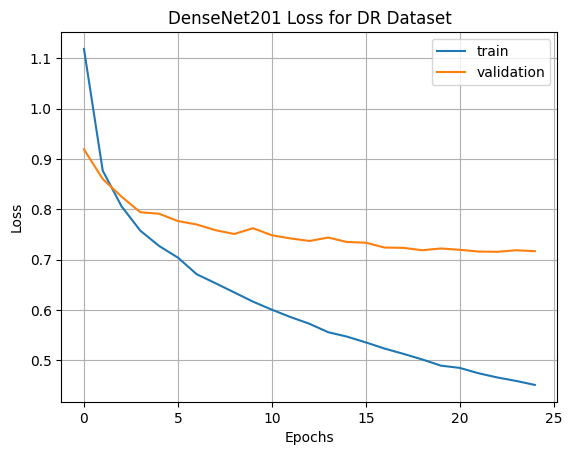

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet201 Loss for DR Dataset')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()